# Gumbel integral 
In this notebook we present an efficient way of evaluating the gumbel integral using results from Fog https://www.tandfonline.com/doi/abs/10.1080/03610910701790236


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
import sys
import os

sys.path.append('../cmc/')
from methods import *

In [2]:
# Toy example
seed = 0
N = 100       # population size
n = 10        # sample size
random.seed(seed)

w = np.arange(1,N+1)    # weights 
w = w/sum(w)
#s = random.sample(list(np.arange(N)),n)   # sample indexed  
s = np.arange(N)[-n:]
sc = list(set(np.arange(N))-set(s))       # remaining indexes
d = sum(w[sc])    # weight sum of S complement

print('Population size is {}, sample size is {}, sample weight sum is {:.4f}.'.format(N,n,1-d))

Population size is 100, sample size is 10, sample weight sum is 0.1891.


In [3]:
mw = mwnchypg(verbose=True)
_,_ = mw.direct_integral(w, s)

Direct integration
-------------------------
Result:1.6753994001578363e-11 
Error: 3.1512149218908744e-11 
Relative error: 1.8808738510912706


In [4]:
_,_ = mw.transformed_integral(w, s)

Transformed integration
-------------------------
Result:5.2343602386570085e-11 
Error: 2.1641618085938772e-15 
Relative error: 4.134529741783957e-05


In [5]:
_ = mw.laplace_approx(w, s)

Laplace's method
-------------------------
Result: 5.4250491277284027e-11


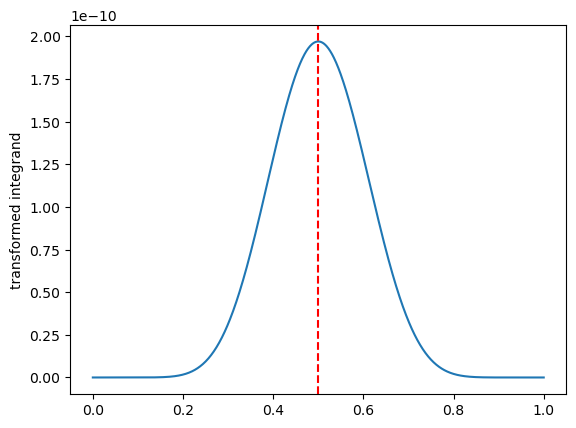

The reciprocal of d is 1.233211233211233, note if the value is too large,               Laplace method is generally not recommended.


In [6]:
mw.check_shape(w, s)